In [50]:
from pygeoinf.interval.lebesgue_space import Lebesgue
from pygeoinf.interval.sobolev_space import Sobolev
from pygeoinf.interval.operators import Laplacian, InverseLaplacian
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.boundary_conditions import BoundaryConditions
from pygeoinf.interval.functions import Function
from pygeoinf.interval.spectral_sampling import SpectralSampler
import numpy as np
from matplotlib import pyplot as plt

In [53]:
function_domain = IntervalDomain(0.0, 1.0)
l2_space_dim = 10
# Use a standard Fourier basis so functions have coefficients available
l2space = Lebesgue(l2_space_dim, function_domain, basis=None)

bcs = BoundaryConditions('periodic', left=0.0, right=0.0)
method = 'spectral'
laplacian_fd_dofs = 100
laplacian_fd_order = 2
laplacian = Laplacian(l2space, bcs, method=method,
                      dofs=laplacian_fd_dofs,
                      fd_order=laplacian_fd_order)
# Provide a reasonable dofs parameter for the inverse operator
inv_laplacian = InverseLaplacian(l2space, bcs, dofs=500)

<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

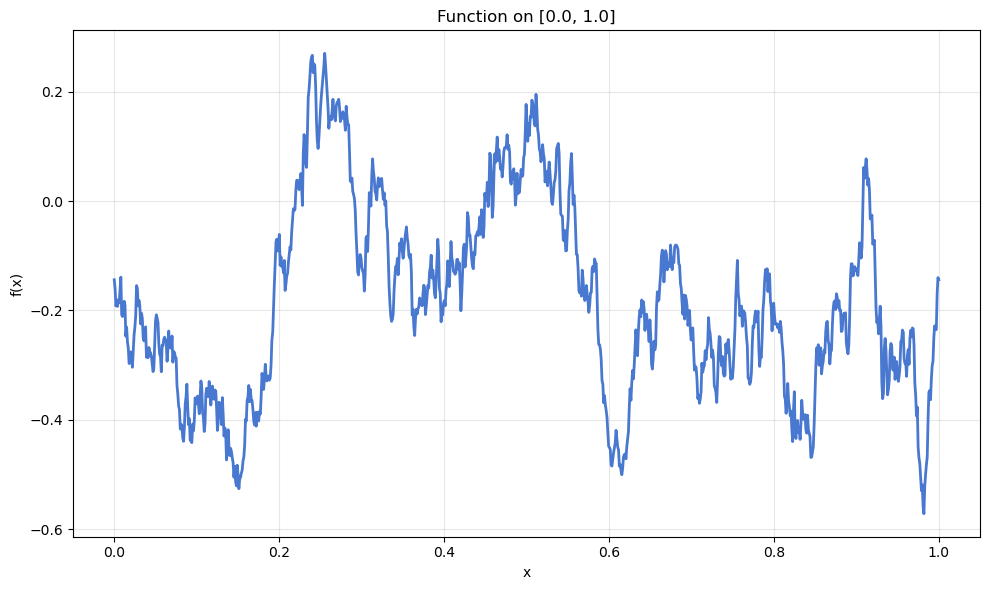

In [58]:
sampler = SpectralSampler(inv_laplacian, n_modes=1000)
sampler.sample().plot()